In [3]:
import torch
from torchvision import datasets, transforms
import PIL


In [5]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

new_data = []

# Iterate over the dataset, extract 1s, 2s, 3s, 4s
for images, labels in trainloader:
    for i in range(len(labels)):
        if labels[i] in [1, 2]:
            new_image = images[i].clone()  # Copy the image
            # This is to add 3 or 4 at the bottom-right corner of 1 and 2
            for image_small, label_small in trainloader:
                for j in range(len(label_small)):
                    if label_small[j] in [3, 4]:
                        # Convert tensor to numpy array and remove the first dimension
                        numpy_image = image_small[j].numpy().squeeze()

                        # Convert numpy array to PIL image
                        pil_image = PIL.Image.fromarray(numpy_image)

                        # Resize to 7x7
                        transform_resize = transforms.Compose([transforms.Resize((7, 7)), transforms.ToTensor()])
                        small_image = transform_resize(pil_image)

                        # Overlay small_image at the bottom right corner of new_image
                        new_image[0, -7:, -7:] = small_image[0, :, :]

                        new_data.append((new_image, labels[i]))  # Append the new image and the label to the new_data
                        break
                else:
                    continue
                break
        else:
            continue

new_trainloader = torch.utils.data.DataLoader(new_data, batch_size=64, shuffle=True)


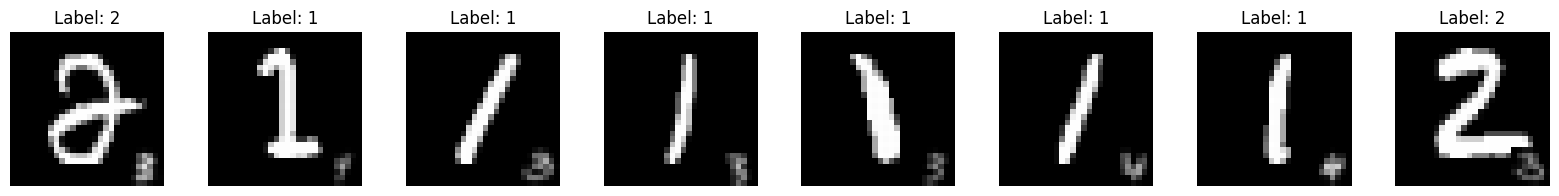

In [6]:
import matplotlib.pyplot as plt

# Plot the first 8 images
fig, axs = plt.subplots(1, 8, figsize=(20, 2))

for i, (image, label) in enumerate(new_data[:8]):
    axs[i].imshow(image.squeeze().numpy(), cmap='gray')
    axs[i].set_title('Label: '+str(label.item()))
    axs[i].axis('off')

plt.show()
